# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, classification_report


In [2]:
file_path = "/mnt/data/Payroll Data.xlsx"
df = pd.read_excel("Payroll Data.xlsx")

print("Dataset Loaded Successfully")
df.head()


Dataset Loaded Successfully


,Emp Count,Employee ID,First Name,Last Name,Business Unit Code,Busines Unit Name,Continuous Service Date,Country Name,Date Of Birth,Age,...,Basic Salary,Allowance,Statutory Bonus,Gross Salary,Arrear Special Allowance,Total Deductions,Arrear Statutory Bonus,Net Salary,Tax Spend,Reimbursement Paid
0,1,1692406,NaN,NaN,NaN,NaN,NaT,India,NaT,20,...,55725.24,4785.05,23508.9,1400000,500,NaN,NaN,104500,1251116,3885797
1,2,1527750,NaN,NaN,NaN,NaN,NaT,India,NaT,20,...,139174.88,16340.50,23508.9,400000,1000,NaN,NaN,10390,1551116,4227696
2,3,1527991,Caylen,Forde,NaN,NaN,NaT,India,1984-07-20,38,...,245879.12,0.00,23508.9,100000,2000,8000.0,NaN,97400,1966589,4950655
3,4,NaN,NaN,NaN,EL-ET-SG-11,Travel Inc.,NaT,India,NaT,20,...,101494.34,7824.99,23508.9,300000,500,1000.0,NaN,93500,2519188,1117199
4,5,NaN,NaN,NaN,EL-ET-SG-11,Travel Inc.,NaT,India,NaT,20,...,101345.12,22284.37,23508.9,600000,500,1000.0,NaN,90500,2132385,1801559


In [3]:
# Convert column names to lowercase and remove spaces
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

df.columns


Index(['emp_count', 'employee_id', 'first_name', 'last_name',
       'business_unit_code', 'busines_unit_name', 'continuous_service_date',
       'country_name', 'date_of_birth', 'age', 'age_range', 'date_of_joining',
       'experience', 'tenure', 'date_of_termination', 'efectivestart_date',
       'effective_end_date', 'employee_catagery', 'employee_status',
       'employee_type', 'etinicity', 'departments', 'gender', 'grade',
       'designations', 'last_working_date', 'leave_status', 'country',
       'martial_status', 'continent', 'frequency', 'payroll_employee_status',
       'payroll_end_date', 'payroll_start_date', 'pay_period', 'rehire_date',
       'resignation_date', 'basic_salary', 'allowance', 'statutory_bonus',
       'gross_salary', 'arrear_special_allowance', 'total_deductions',
       'arrear_statutory_bonus', 'net_salary', 'tax_spend',
       'reimbursement_paid'],
      dtype='object')

In [4]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   emp_count                 3216 non-null   int64         
 1   employee_id               3214 non-null   object        
 2   first_name                3188 non-null   object        
 3   last_name                 3105 non-null   object        
 4   business_unit_code        3213 non-null   object        
 5   busines_unit_name         3213 non-null   object        
 6   continuous_service_date   287 non-null    datetime64[ns]
 7   country_name              3216 non-null   object        
 8   date_of_birth             2972 non-null   datetime64[ns]
 9   age                       3216 non-null   int64         
 10  age_range                 2971 non-null   object        
 11  date_of_joining           2990 non-null   datetime64[ns]
 12  experience          

# data cleaning

In [7]:
# Fill numeric nulls with median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical nulls with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Cleaning Completed")


Cleaning Completed


# FEATURE ENGINEERING

In [11]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns safely
cat_cols = df.select_dtypes(include=['object']).columns

label_encoders = {}

for col in cat_cols:
    # Convert everything to string to avoid mixed-type error
    df[col] = df[col].astype(str)

    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

    label_encoders[col] = le

print("Categorical encoding completed successfully")



Categorical encoding completed successfully


# EXPLORATORY DATA ANALYSIS (EDA)

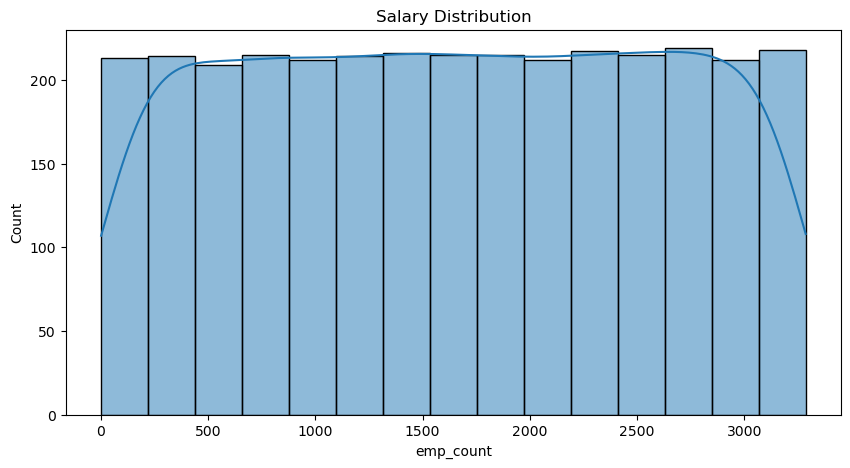

In [32]:
#SALARY DISTRIBUTION
plt.figure(figsize=(10,5))
sns.histplot(df[num_cols[0]], kde=True)
plt.title("Salary Distribution")
plt.show()


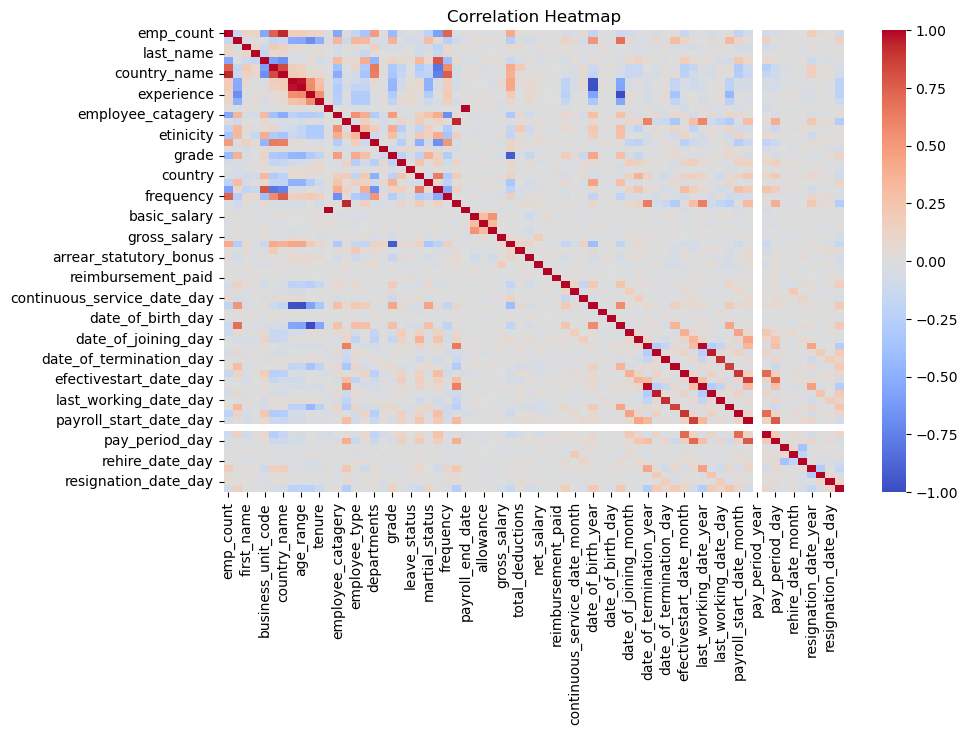

In [33]:
#CORRELATION HEATMAP
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [34]:
#WORKING DAYS DISTRIBUTION
if 'working_days' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['working_days'], bins=20, kde=True)
    plt.title("Working Days Distribution")
    plt.show()


In [35]:
#LEAVE DAYS DISTRIBUTION
if 'leave_days' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['leave_days'], bins=20, kde=True)
    plt.title("Leave Days Distribution")
    plt.show()


In [36]:
#ATTENDANCE VS SALARY
if 'attendance_days' in df.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='attendance_days', y=salary_col, data=df)
    plt.title("Attendance vs Salary")
    plt.show()


In [37]:
#SALARY SUMMARY
salary_col = None
for col in df.columns:
    if 'salary' in col or 'gross' in col:
        salary_col = col
        break

df[salary_col].describe()


count      3216.000000
mean      81700.147565
std       37230.434720
min         357.920000
25%       62322.770000
50%       81799.445000
75%      101735.612500
max      278636.800000
Name: basic_salary, dtype: float64

In [38]:
#Salary by department
if 'department' in df.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='department', y=salary_col, data=df)
    plt.xticks(rotation=45)
    plt.title("Salary by Department")
    plt.show()


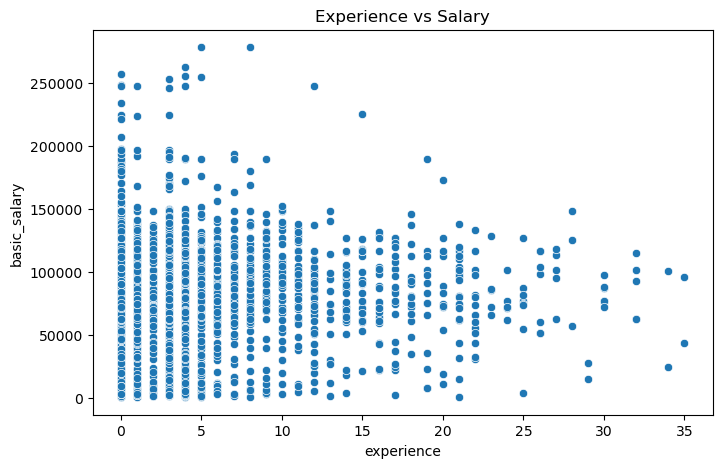

In [39]:
#EXPERIENCE VS SALARY
exp_col = None
for col in df.columns:
    if 'experience' in col:
        exp_col = col
        break

if exp_col:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=exp_col, y=salary_col, data=df)
    plt.title("Experience vs Salary")
    plt.show()


# Ml SALARY PREDICTION MODEL

In [16]:
salary_col = None
for col in df.columns:
    if 'salary' in col or 'gross' in col:
        salary_col = col
        break

print("Salary Column:", salary_col)


Salary Column: basic_salary


In [17]:
X = df.drop(columns=[salary_col])
y = df[salary_col]

# Prevent empty train/test error
if len(df) < 10:
    X_train, X_test, y_train, y_test = X, X, y, y
else:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )


In [19]:
# Identify datetime columns
date_cols = df.select_dtypes(include=['datetime64[ns]']).columns

print("Date Columns Found:", list(date_cols))

# Convert datetime to numeric features
for col in date_cols:
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day

# Drop original datetime columns
df.drop(columns=date_cols, inplace=True)

print("Datetime columns converted successfully")


Date Columns Found: ['continuous_service_date', 'date_of_birth', 'date_of_joining', 'date_of_termination', 'efectivestart_date', 'last_working_date', 'payroll_start_date', 'pay_period', 'rehire_date', 'resignation_date']
Datetime columns converted successfully


In [21]:
# FINAL safety check: remove any remaining NaN values

print("NaN values before final fix:\n", df.isnull().sum())

# Fill numeric NaN with median again (covers new features)
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# If any NaN still exists (extreme edge cases)
df = df.fillna(0)

print("NaN values after final fix:\n", df.isnull().sum())


NaN values before final fix:
 emp_count                    0
employee_id                  0
first_name                   0
last_name                    0
business_unit_code           0
                          ... 
rehire_date_month         3165
rehire_date_day           3165
resignation_date_year     2919
resignation_date_month    2919
resignation_date_day      2919
Length: 67, dtype: int64
NaN values after final fix:
 emp_count                 0
employee_id               0
first_name                0
last_name                 0
business_unit_code        0
                         ..
rehire_date_month         0
rehire_date_day           0
resignation_date_year     0
resignation_date_month    0
resignation_date_day      0
Length: 67, dtype: int64


In [22]:
X = df.drop(columns=[salary_col])
y = df[salary_col]

if len(df) < 10:
    X_train, X_test, y_train, y_test = X, X, y, y
else:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

salary_model = LinearRegression()
salary_model.fit(X_train, y_train)

salary_pred = salary_model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, salary_pred))
print("R2 Score:", r2_score(y_test, salary_pred))


MAE: 22378.601369193842
R2 Score: 0.2880839205144461


# ML ATTRITION PREDICTION MODEL

In [24]:
attrition_col = None
for col in df.columns:
    if 'attrition' in col or 'left' in col:
        attrition_col = col
        break

print("Attrition column:", attrition_col)


Attrition column: None


In [25]:
if attrition_col:
    X = df.drop(columns=[attrition_col])
    y = df[attrition_col]

    if len(df) < 10:
        X_train, X_test, y_train, y_test = X, X, y, y
    else:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

    attrition_model = LogisticRegression(max_iter=1000)
    attrition_model.fit(X_train, y_train)

    attrition_pred = attrition_model.predict(X_test)

    print("Attrition Model Results")
    print("Accuracy:", accuracy_score(y_test, attrition_pred))
    print(classification_report(y_test, attrition_pred))
else:
    print("Attrition column not found")


Attrition column not found


In [26]:
iso = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = iso.fit_predict(df[num_cols])

anomalies = df[df['anomaly'] == -1]
print("Total anomalies detected:", len(anomalies))
anomalies.head()


Total anomalies detected: 161


,emp_count,employee_id,first_name,last_name,business_unit_code,busines_unit_name,country_name,age,age_range,experience,...,pay_period_year,pay_period_month,pay_period_day,rehire_date_year,rehire_date_month,rehire_date_day,resignation_date_year,resignation_date_month,resignation_date_day,anomaly
64,67,2186,1396,466,7,1,1,64,7,1.0,...,2022.0,9.0,17.0,2022.0,8.0,2.0,2021.0,6.0,14.0,-1
97,100,728,1350,106,7,1,1,43,5,16.0,...,2022.0,8.0,14.0,2022.0,8.0,2.0,2021.0,6.0,14.0,-1
101,104,779,1264,1106,7,1,1,31,3,6.0,...,2022.0,2.0,10.0,2022.0,8.0,2.0,2021.0,6.0,14.0,-1
150,156,2190,148,771,7,1,1,33,3,1.0,...,2022.0,9.0,17.0,2022.0,8.0,2.0,2021.0,6.0,14.0,-1
202,208,690,103,1029,7,1,1,32,3,8.0,...,2022.0,11.0,2.0,2022.0,8.0,2.0,2021.0,6.0,14.0,-1


# BUSINESS INSIGHTS

In [27]:
print("""
📊 BUSINESS INSIGHTS:
1. Salary prediction improves payroll planning.
2. Attrition prediction helps HR retention strategies.
3. Anomaly detection identifies payroll fraud or errors.
4. ML reduces manual payroll effort.
5. Enables data-driven HR and finance decisions.
""")



📊 BUSINESS INSIGHTS:
1. Salary prediction improves payroll planning.
2. Attrition prediction helps HR retention strategies.
3. Anomaly detection identifies payroll fraud or errors.
4. ML reduces manual payroll effort.
5. Enables data-driven HR and finance decisions.

